In [258]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

# Data loading
Load the benchmark data into a Pandas `DataFrame`

In [259]:
all_pickles = glob.glob('benchmark_results/*pickle')
print(len(all_pickles))
benchmarks = sorted(list(set(['_'.join(name.split('/')[1].split('_')[0:2]) for name in all_pickles])))
processors = sorted(list(set([name.split('/')[1].split('_')[2] for name in all_pickles])))
print('Benchmarks:', benchmarks)
print('Quantum computers:', processors)

df = pd.DataFrame(data=None, index=processors, columns=benchmarks)

1495
Benchmarks: ['bitcode_3qubits2rounds', 'bitcode_3qubits3rounds', 'bitcode_5qubits2rounds', 'bitcode_5qubits3rounds', 'ghz_11qubits', 'ghz_3qubits', 'ghz_5qubits', 'ghz_7qubits', 'hamsim_11qubits1steps', 'hamsim_11qubits3steps', 'hamsim_4qubits1steps', 'hamsim_4qubits3steps', 'hamsim_7qubits1steps', 'hamsim_7qubits3steps', 'merminbell_3qubits', 'merminbell_4qubits', 'phasecode_3qubits2rounds', 'phasecode_3qubits3rounds', 'phasecode_5qubits2rounds', 'phasecode_5qubits3rounds', 'qaoafswap_11qubits', 'qaoafswap_4qubits', 'qaoafswap_5qubits', 'qaoafswap_7qubits', 'qaoavanilla_11qubits', 'qaoavanilla_4qubits', 'qaoavanilla_5qubits', 'qaoavanilla_7qubits', 'vqe_4qubits1layers', 'vqe_4qubits2layers', 'vqe_7qubits1layers', 'vqe_7qubits2layers']
Quantum computers: ['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']


In [262]:
# Fill in the dataframe
for qc in df.index:
    for bmark in df.columns:
        pickles = glob.glob(f'benchmark_results/{bmark}_{qc}_*.pickle')
        #print(qc, bmark, len(pickles))
        if len(pickles) > 0:
            scores = []
            for pklfile in pickles:
                with open(pklfile, 'rb') as pf:
                    result = pickle.load(pf)
                    scores.append(result['score'])
            print(f'{qc} - {bmark}: {len(scores)} runs')
            df.at[qc, bmark] = (np.mean(scores), np.std(scores))

aspen9 - bitcode_3qubits2rounds: 5 runs
aspen9 - bitcode_3qubits3rounds: 5 runs
aspen9 - bitcode_5qubits2rounds: 5 runs
aspen9 - bitcode_5qubits3rounds: 5 runs
aspen9 - ghz_11qubits: 8 runs
aspen9 - ghz_3qubits: 8 runs
aspen9 - ghz_7qubits: 8 runs
aspen9 - hamsim_11qubits1steps: 6 runs
aspen9 - hamsim_11qubits3steps: 6 runs
aspen9 - hamsim_4qubits1steps: 6 runs
aspen9 - hamsim_4qubits3steps: 6 runs
aspen9 - hamsim_7qubits1steps: 6 runs
aspen9 - hamsim_7qubits3steps: 6 runs
aspen9 - merminbell_3qubits: 9 runs
aspen9 - merminbell_4qubits: 9 runs
aspen9 - phasecode_3qubits2rounds: 5 runs
aspen9 - phasecode_3qubits3rounds: 5 runs
aspen9 - phasecode_5qubits2rounds: 5 runs
aspen9 - phasecode_5qubits3rounds: 5 runs
aspen9 - qaoafswap_11qubits: 6 runs
aspen9 - qaoafswap_4qubits: 6 runs
aspen9 - qaoafswap_7qubits: 6 runs
aspen9 - qaoavanilla_11qubits: 6 runs
aspen9 - qaoavanilla_4qubits: 6 runs
aspen9 - qaoavanilla_7qubits: 6 runs
aspen9 - vqe_4qubits1layers: 6 runs
aspen9 - vqe_4qubits2layers:

In [263]:
df.head()

,bitcode_3qubits2rounds,bitcode_3qubits3rounds,bitcode_5qubits2rounds,bitcode_5qubits3rounds,ghz_11qubits,ghz_3qubits,ghz_5qubits,ghz_7qubits,hamsim_11qubits1steps,hamsim_11qubits3steps,...,qaoafswap_5qubits,qaoafswap_7qubits,qaoavanilla_11qubits,qaoavanilla_4qubits,qaoavanilla_5qubits,qaoavanilla_7qubits,vqe_4qubits1layers,vqe_4qubits2layers,vqe_7qubits1layers,vqe_7qubits2layers
aspen9,"(0.02920000000000006, 0.017010584939971988)","(0.023200000000000033, 0.012796874618437122)","(0.0001999999999999984, 0.0003999999999999968)","(0.0005999999999999952, 0.0004898979485566317)","(0.013557954227369697, 0.010827409777666159)","(0.5961065804365742, 0.10873707989724257)",NaN,"(0.07671145338283744, 0.05299006558589662)","(0.6948253972855136, 0.015071310445039636)","(0.7014136095454658, 0.04272358677417333)",...,NaN,"(0.5012294016110297, 0.020672340207815897)","(0.5151092401678011, 0.01684089521620293)","(0.5262361373096438, 0.04791477058015835)",NaN,"(0.5201700592306105, 0.00853276030968556)","(0.8321382150945942, 0.05455935122720984)","(0.6453458209731211, 0.07813916570823504)","(0.5906260049398041, 0.049676935492954745)","(0.525069381035911, 0.017836550176697667)"
casablanca,"(0.5546333333333334, 0.10020719645924747)","(0.43075, 0.08002851054468024)",NaN,NaN,NaN,"(0.8984891923637771, 0.037128489088605235)",NaN,"(0.6177598669933162, 0.11456292194993746)",NaN,NaN,...,NaN,"(0.5027195873580551, 0.014658782420876778)",NaN,"(0.6496656266889497, 0.08696208962533956)",NaN,"(0.5068062803247418, 0.02486682066600696)","(0.9548476355511805, 0.03316828599854612)","(0.9327869236948118, 0.018576138049901537)","(0.7875650130497253, 0.058269504856116434)","(0.6840733554270085, 0.07270752843759908)"
guadalupe,"(0.4795333333333333, 0.06442941012370736)","(0.29875000000000007, 0.10734752475687814)","(0.2163461538461524, 0.04456817794354067)","(0.09319230769230646, 0.04045916196589149)","(0.5639691888849663, 0.024757153529353162)","(0.8961170720369919, 0.031305392039823056)","(0.767775111299809, 0.021198073653664218)","(0.7426132784159916, 0.03232988148605345)","(0.8993481245582409, 0.04241285358496244)","(0.8714136095454658, 0.033344233754902274)",...,"(0.7274658851521214, 0.031454841681199774)","(0.6495512538889228, 0.029686695392125758)","(0.4959110414909474, 0.011974146457726105)","(0.7989175876564241, 0.03686387013353871)","(0.5287843725868111, 0.008642464307266728)","(0.4743954026008575, 0.016975474316683305)","(0.9568318461114598, 0.028459333622441095)","(0.8916924063140855, 0.03143364575573273)","(0.8558782438500637, 0.036319660108791375)","(0.8591583423179352, 0.034472243634224596)"
ionq,"(0.9828571428571429, 0.022857142857142864)","(0.8285714285714286, 0.059931934181151496)","(0.9142857142857143, 0.06259686371487606)","(0.702857142857143, 0.08398250546685176)","(0.7036744609054615, 0.13062606685216688)","(0.9682344221958906, 0.025779868227857168)",NaN,"(0.8400347609898332, 0.1027200201387368)","(0.9226370855972021, 0.0284695810345582)","(0.8024915316233879, 0.03280916938787259)",...,NaN,"(0.5767031934747083, 0.08117583240487271)","(0.5406524713851507, 0.0924577746021975)","(0.804823835159409, 0.12487185352513971)",NaN,"(0.5600693934099764, 0.08558945436318427)","(0.9534429266255753, 0.023387490655407715)","(0.894500902489168, 0.050811342887659414)","(0.9258690698485821, 0.03282379765725895)","(0.8385313263286741, 0.06767573693696641)"
lagos,"(0.677857142857143, 0.12199757441549934)","(0.6320714285714287, 0.10160266748868522)",NaN,NaN,NaN,"(0.9379666920572876, 0.026076813907432425)",NaN,"(0.4297233547075253, 0.23262753283426585)",NaN,NaN,...,NaN,"(0.49123626640928697, 0.017259846555533764)",NaN,"(0.576501297687647, 0.11507667727031454)",NaN,"(0.5012634890057656, 0.03368928187461274)","(0.8772190460951234, 0.04065820158073897)","(0.7654553183042374, 0.09011322378948512)","(0.7350334803494402, 0.07104028936575021)","(0.6070200256323305, 0.056661784387992895)"


In [264]:
def get_names(df, benchmarks):
    names = []
    for bmark in benchmarks:
        temp_names = []
        column_df = df.loc[:, bmark]
        for qpu in column_df.index:
            if isinstance(column_df.loc[qpu], tuple):
                temp_names.append(qpu)
        if len(temp_names) > len(names):
            names = temp_names
    return names

# GHZ

['ghz_3qubits', 'ghz_5qubits', 'ghz_7qubits', 'ghz_11qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-qubits', '5-qubits', '7-qubits', '11-qubits']


Text(0, 0.5, 'Score')

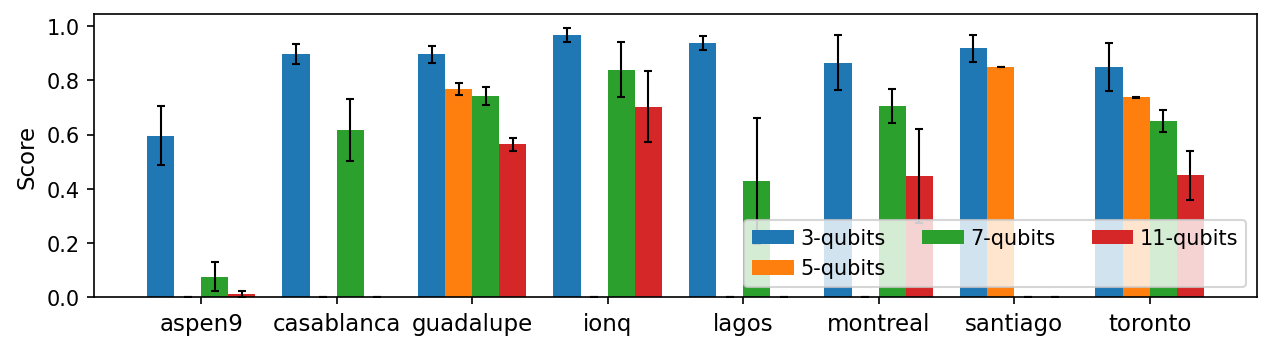

In [266]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'ghz' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*2
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.55, 0., 0.45, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Mermin-Bell

['merminbell_3qubits', 'merminbell_4qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-qubits', '4-qubits']


Text(0, 0.5, 'Score')

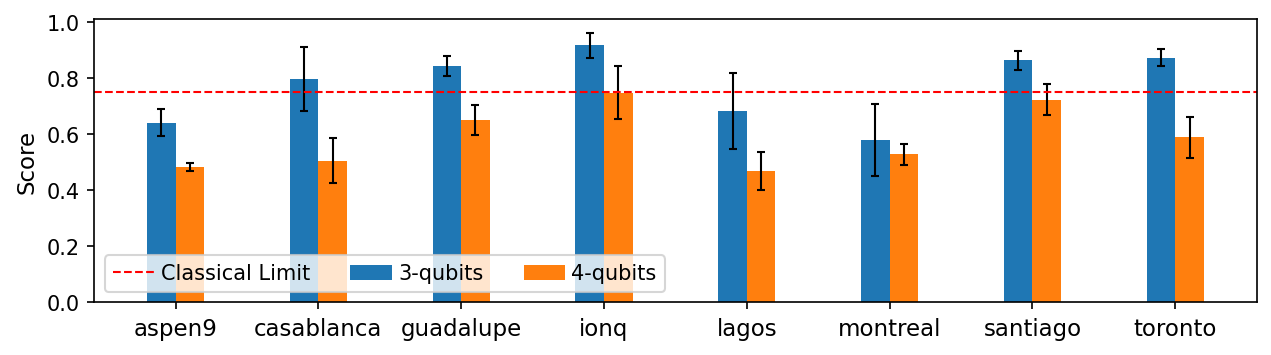

In [268]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'mermin' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.axhline(0.75, c='r', ls='--', label='Classical Limit', lw=1)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.0, 0.0, 0.5, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Hamiltonian Simulation

['hamsim_4qubits1steps', 'hamsim_4qubits3steps', 'hamsim_7qubits1steps', 'hamsim_7qubits3steps', 'hamsim_11qubits1steps', 'hamsim_11qubits3steps']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits, 1-step', '4-qubits, 3-steps', '7-qubits, 1-step', '7-qubits, 3-steps', '11-qubits, 1-step', '11-qubits, 3-steps']


Text(0, 0.5, 'Score')

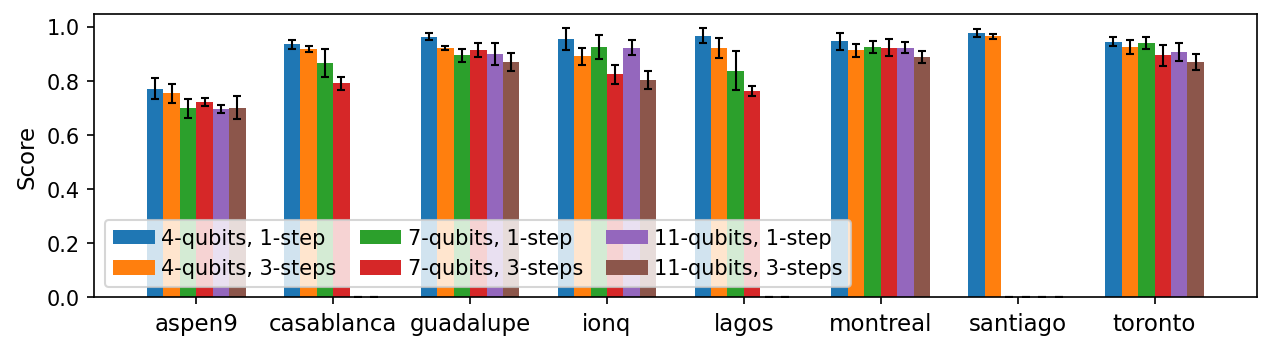

In [269]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.12

benchmarks = sorted([idx for idx in df.columns if 'hamsim' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['4-qubits, 1-step', '4-qubits, 3-steps', '7-qubits, 1-step', '7-qubits, 3-steps', '11-qubits, 1-step', '11-qubits, 3-steps']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*3
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
#ax.set_ylim([0,1.15])
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.0, 0.0, 0.66, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)

#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# QAOA Fermionic SWAP Proxy

['qaoafswap_4qubits', 'qaoafswap_5qubits', 'qaoafswap_7qubits', 'qaoafswap_11qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits', '5-qubits', '7-qubits', '11-qubits']


Text(0, 0.5, 'Score')

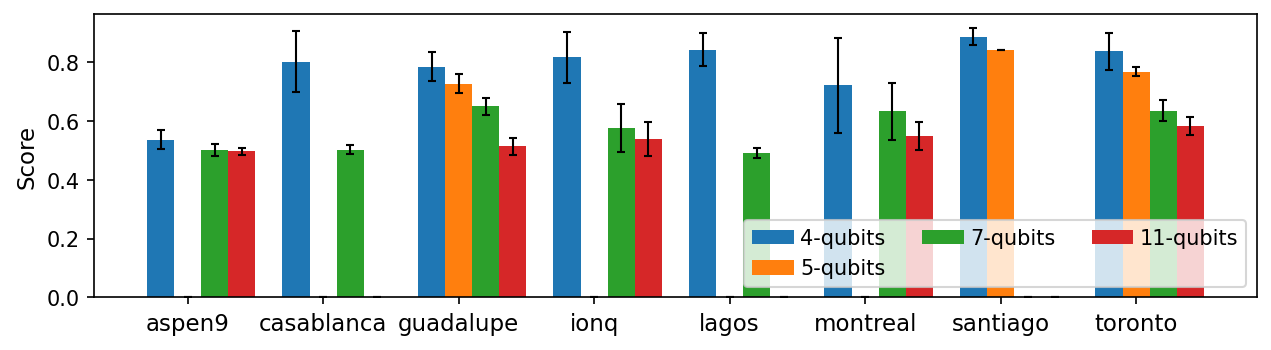

In [270]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'qaoafswap' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*1.5
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.55, 0., 0.45, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# QAOA Vanilla Proxy

['qaoavanilla_4qubits', 'qaoavanilla_5qubits', 'qaoavanilla_7qubits', 'qaoavanilla_11qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits', '5-qubits', '7-qubits', '11-qubits']


Text(0, 0.5, 'Score')

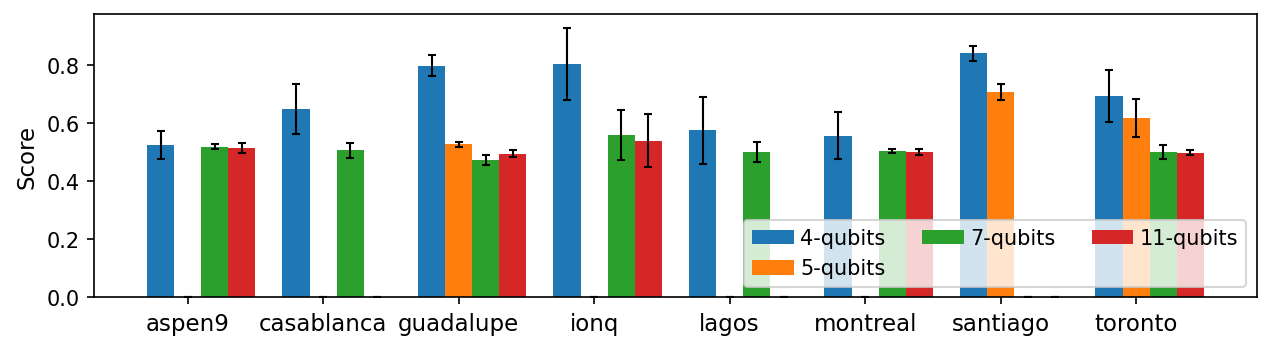

In [271]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'qaoavanilla' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*1.5
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.55, 0., 0.45, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# VQE Proxy

['vqe_4qubits1layers', 'vqe_4qubits2layers', 'vqe_7qubits1layers', 'vqe_7qubits2layers']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits, 1-layer', '4-qubits, 2-layers', '7-qubits, 1-layer', '7-qubits, 2-layers']


Text(0, 0.5, 'Score')

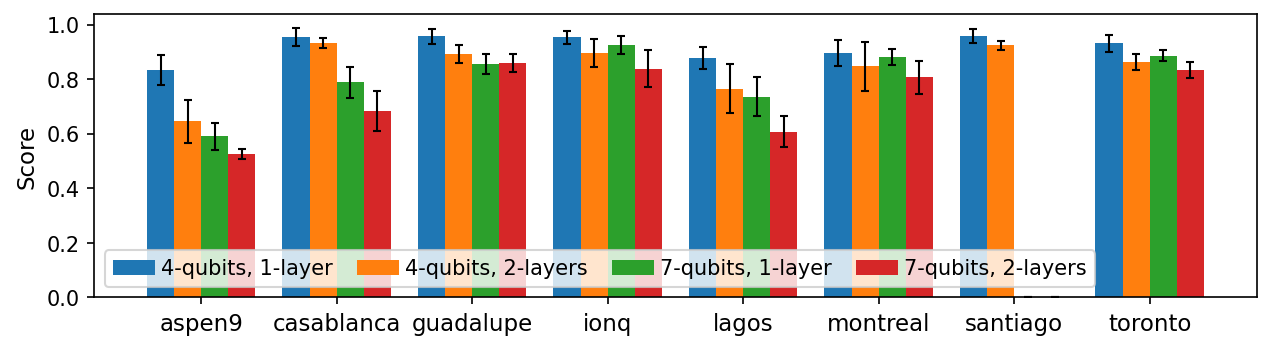

In [272]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'vqe' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['4-qubits, 1-layer', '4-qubits, 2-layers', '7-qubits, 1-layer', '7-qubits, 2-layers']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*2
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=4, bbox_to_anchor=(0.0, 0., 0.87, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Bit Code

['bitcode_3qubits2rounds', 'bitcode_3qubits3rounds', 'bitcode_5qubits2rounds', 'bitcode_5qubits3rounds']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']


Text(0, 0.5, 'Score')

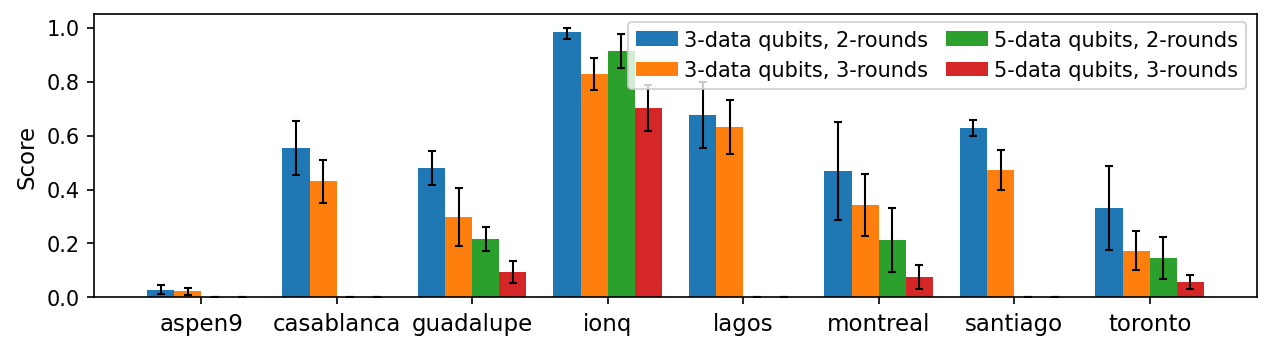

In [273]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'bitcode' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*2
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
#ax.set_ylim([0,0.9])
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=2, bbox_to_anchor=(0.45, 0.7, 0.55, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Phase Code

['phasecode_3qubits2rounds', 'phasecode_3qubits3rounds', 'phasecode_5qubits2rounds', 'phasecode_5qubits3rounds']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']


Text(0, 0.5, 'Score')

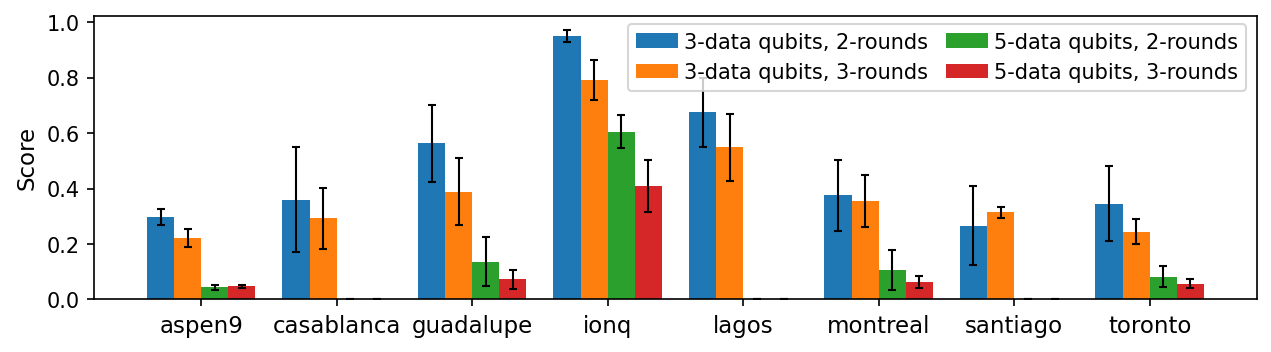

In [274]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'phasecode' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*2
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
#ax.set_ylim([0,0.9])
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=2, bbox_to_anchor=(0.45, 0.7, 0.55, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Correlate features with performance

In [275]:
score_df = df

In [276]:
feature_df = pd.read_pickle('feature_dataframe.pickle')
feature_df.head()

,Communication,Liveness,Parallelism,Measurement,Entanglement,Depth,qubits,entangling-gates,regular-depth
bitcode_3qubits2rounds,0.4,0.622222,0.181818,0.818182,0.727273,0.75,5,8,9
bitcode_3qubits3rounds,0.4,0.633333,0.2,0.733333,0.8,0.666667,5,12,12
bitcode_5qubits2rounds,0.222222,0.461538,0.380952,0.809524,0.761905,0.625,9,16,13
bitcode_5qubits3rounds,0.222222,0.513889,0.448276,0.724138,0.827586,0.5,9,24,16
ghz_11qubits,0.181818,0.242424,0,1.0,0.909091,1.0,11,10,12


In [277]:
correlation_df = pd.DataFrame(data=None, index=score_df.index, columns=feature_df.columns)
correlation_df.head()

,Communication,Liveness,Parallelism,Measurement,Entanglement,Depth,qubits,entangling-gates,regular-depth
aspen9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
casablanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guadalupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ionq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
for feature in correlation_df.columns:
    print(feature)
    
    application_features = feature_df.loc[:, feature]
    
    for device in correlation_df.index:
        scores = score_df.loc[device, :]

        x, y = [], []
        for benchmark in scores.index:
            if isinstance(scores.loc[benchmark], tuple):
                x.append(application_features.loc[benchmark])
                y.append(scores.loc[benchmark][0])

        X = np.array(x)[:, np.newaxis]
        Y = np.array(y)
        model = LinearRegression().fit(X, Y)
        correlation = model.score(X, Y)
        print(f'\t{device}: {correlation:.3f}')
        
        correlation_df.loc[device, feature] = correlation

Communication
	aspen9: 0.095
	casablanca: 0.001


KeyError: 'ghz_5qubits'

In [256]:
correlation_df

,Communication,Liveness,Parallelism,Measurement,Entanglement,Depth,qubits,entangling-gates,regular-depth
aspen9,0.095448,0.042957,0.080055,0.444317,0.328925,0.041258,0.078636,0.011987,0.076684
casablanca,0.000596,0.001162,0.000163,0.019259,0.119584,0.269924,0.077786,0.078943,0.013263
guadalupe,0.033807,0.012543,0.003686,0.101887,0.159875,0.23708,0.146175,0.026681,0.000889
ionq,0.000285,0.005624,0.139548,0.050955,0.043032,0.476061,0.291062,0.374441,0.279645
lagos,0.030059,0.018619,0.000002,0.00406,0.15467,0.20885,0.186378,0.129074,0.022134
montreal,0.002516,0.000654,0.00001,0.101833,0.14991,0.186705,0.067939,0.004981,0.005314
santiago,0.119526,0.009972,0.015782,0.042284,0.01274,0.211237,0.594934,0.017946,0.000157
toronto,0.034381,0.007268,0.00011,0.162537,0.163101,0.179723,0.093891,0.003496,0.004134
